In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import numpy as np

In [16]:
plot_dir = Path("plots")

### Visualize predictions on separate subplots

Please put test set predictions and targets in some folder and set it below.

The subplot names are given based on the file names.

In [17]:
pred_dir = Path("predictions")
pred_files = pred_dir.glob("*.csv")

# Create a dictionary to store the dataframes
pred_dict = {}

for pred_file in pred_files:
    # Read the csv file
    df = pd.read_csv(pred_file)
    # Get the model name
    model_name = pred_file.stem
    # Store the dataframe in the dictionary
    pred_dict[model_name] = df

print(pred_dict.keys())

dict_keys(['CfC_MAE', 'Convnet_MAE', 'LTC_MAE', 'Target'])


In [18]:
pred_dict["Target"].head()

,0,1,2,3,4,5,6,7,8
0,26.776474,0.005174,1.066857,9.149609,0.0,0.000000,0.0,0.000030,0.089096
1,18.763222,0.000000,0.086821,9.674732,0.0,0.000000,0.0,0.002689,1.085413
2,7.042366,0.000000,0.002595,9.050860,0.0,0.000030,0.0,0.089275,4.856126
3,1.245603,0.000000,0.000000,4.995620,0.0,0.002688,0.0,1.087587,7.981467
4,0.092361,0.000000,0.000000,2.158472,0.0,0.089215,0.0,4.862562,4.903416


In [19]:
custom_colors = sns.color_palette("tab10")

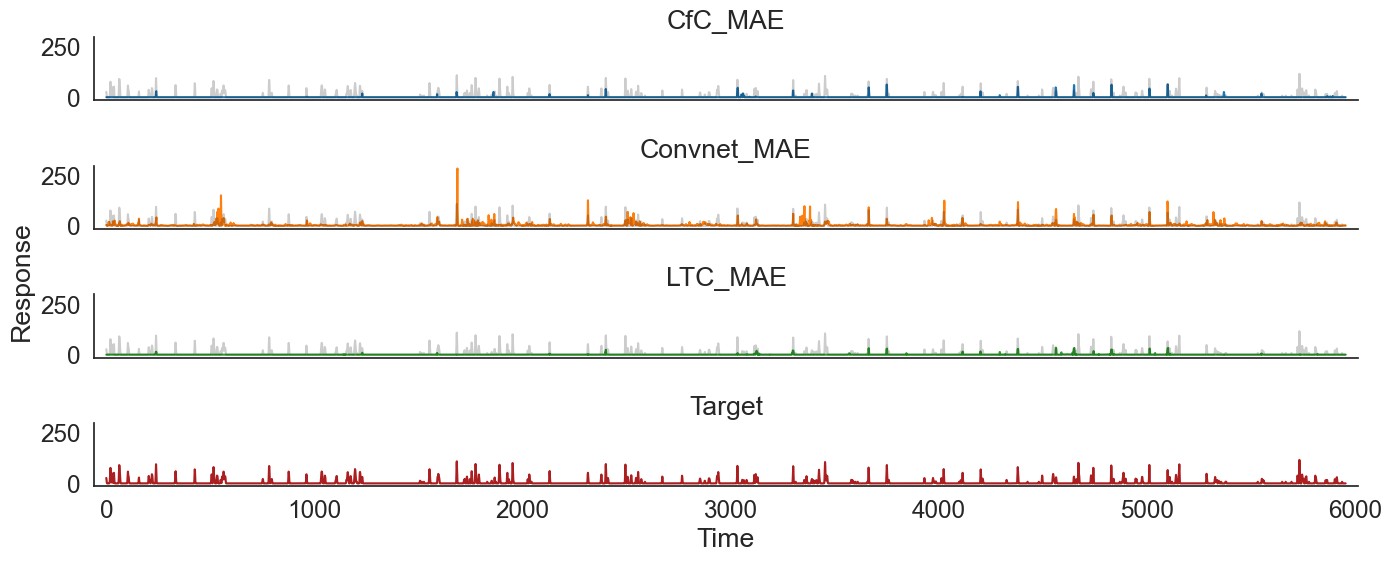

In [20]:
# Plot the predictions on separate subplots using seaborn

# Set the style
sns.set_context("paper")
# Set font_scale according to needs
sns.set(style="white", font_scale=1.6)

# Create a figure and axis
n_subplots = len(pred_dict)
fig, axes = plt.subplots(
    n_subplots,
    1,
    figsize=(
        14,
        1.5 * n_subplots,
    ),
    sharey=True,
)

# Select output channel
output_channel = "0"

# Iterate over the dictionary
for i, (model_name, df) in enumerate(pred_dict.items()):
    # Create a scatter plot
    x_axis_values = df[output_channel].index
    sns.lineplot(
        x=x_axis_values, y=output_channel, data=df, ax=axes[i], color=custom_colors[i]
    )
    # Plot the target values in background
    # Adjust data frame length
    target_df = pred_dict["Target"].iloc[: len(df)]
    sns.lineplot(
        x=target_df.index,
        y=output_channel,
        data=target_df,
        ax=axes[i],
        color="black",
        alpha=0.2,
    )
    # Add a title
    axes[i].set_title(model_name)
    axes[i].get_xaxis().set_visible(False)
    axes[i].set_ylabel("")
    axes[i].margins(x=0.01)

# Set x axis label for the last subplot
axes[-1].get_xaxis().set_visible(True)
axes[-1].set_xlabel("Time")

# Set y axis label for the figure
fig.text(-0.001, 0.5, "Response", va="center", rotation="vertical")

# Set fig title
# fig.suptitle(f"Predictions for output channel {output_channel}", fontsize=18)

sns.despine()
# Adjust the layout
plt.tight_layout()
plt.show()

fig.savefig(plot_dir / "predictions.pdf", bbox_inches="tight")

### Dummy model

In [21]:
data = pred_dict["Target"].values

print("A dummy model that predicts 0 would have the following metrics on the test set:")
# Calculate MSE of a dummy model that predicts the mean of the target
dummy_mse = (data ** 2).mean()
print(f"Dummy model MSE: {dummy_mse:.4f}")

# Calculate MAE of a dummy model that predicts the mean of the target
dummy_mae = np.abs(data).mean()
print(f"Dummy model MAE: {dummy_mae:.4f}")

A dummy model that predicts 0 would have the following metrics on the test set:
Dummy model MSE: 66.2027
Dummy model MAE: 2.3690
